### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent - if colors are congruent or incongruent

Dependent - time taken to name ink colors of a list (equally sized)

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$H_0: \mu_C = \mu_I$

$H_1: \mu_C < \mu_I$

Null: Mean time taken for both lists is the same 

Alternative: Mean time to complete incongruent color list is longer than congruent color list 

$\mu_C$ is the mean time taken for the congruent list, $\mu_I$ is the mean time taken for the incongruent list

Easier to identify a color if its word is congruent, likely takes longer for the incongruent list as brain processes the meaning of the word as well as the color visually.

##### Assumptions

1. Dependent variable is continuous/ordinal
2. Observations are independent of one another
3. Dependent variable is approximately normally distributed
4. Homoscedascity

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('stroopdata.csv')
print(df.head())
print(df.describe())
print(df.info())
df.boxplot(column=['Congruent','Incongruent'])
plt.show()
plt.scatter(x=df['Congruent'],y=df['Incongruent'])
plt.xlabel('Congruent')
plt.ylabel('Incongruent')
plt.show()

   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803
       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes
None


Sample means:
$\bar{x}_C = 14.05, \bar{x}_I = 22.02$

Sample standard deviations:
$s_C = 3.5593, s_I = 4.7971$

Can visually see that the whole IQR of the congruent list is below that of the incongruent list.

Also note outliers for the incongruent list.

Mean time taken for congruent list is almost 8 seconds faster, further supports the hypothesis made.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

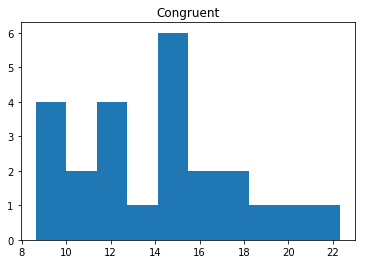

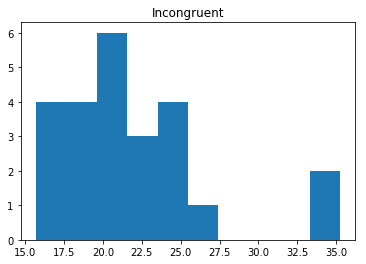

In [2]:
# Build the visualizations here

plt.hist(x=df['Congruent'])
plt.title('Congruent')
plt.show()
plt.hist(x=df['Incongruent'])
plt.title('Incongruent')
plt.show()

Data seems to be normally distributed, incongruent seems to be more right-skewed than congruent.

Mode of congruent is at 14-15seconds, while the mode of incongruent is at 20-21 seconds.
Suggesting it is likely for the congruent list to take about 6 seconds less in general.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [3]:
# Perform the statistical test here
from scipy.stats import ttest_rel
ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

p-value is 0.00000004

Testing at 1% level this is is statistically significant, therefore we reject the null hypothesis.
There is enough evidence to support that the average time taken on the congruent list is less than that of the incongruent list.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Our brains process both the color and meaning of the word since they are taken in at the same time. Since we understand and possibly visualise a color as we read it, we get momentarily confused. It takes a bit more time to process and remember the task at hand is to identify the color of the ink, and not the 'named' color.

Couldn't think of similar tasks but on reading the wikipedia article, I recall playing a game on Lumosity where they show a flock of birds, with the center bird facing a different direction from the rest. The aim of the game: to correctly name the direction the center bird is facing. Sounds like a spatial-stroop-task!

### Sources
1. [Wikipedia: Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect)
2. [Wikipedia: Null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis)
3. [Statistical Test Assumptions](http://www.real-statistics.com/descriptive-statistics/assumptions-statistical-test/)
4. [T test assumptions](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp)
5. [Paired Sample T-test](https://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/)